# Semi-Analytic Solutions for Simply-Supported Beams

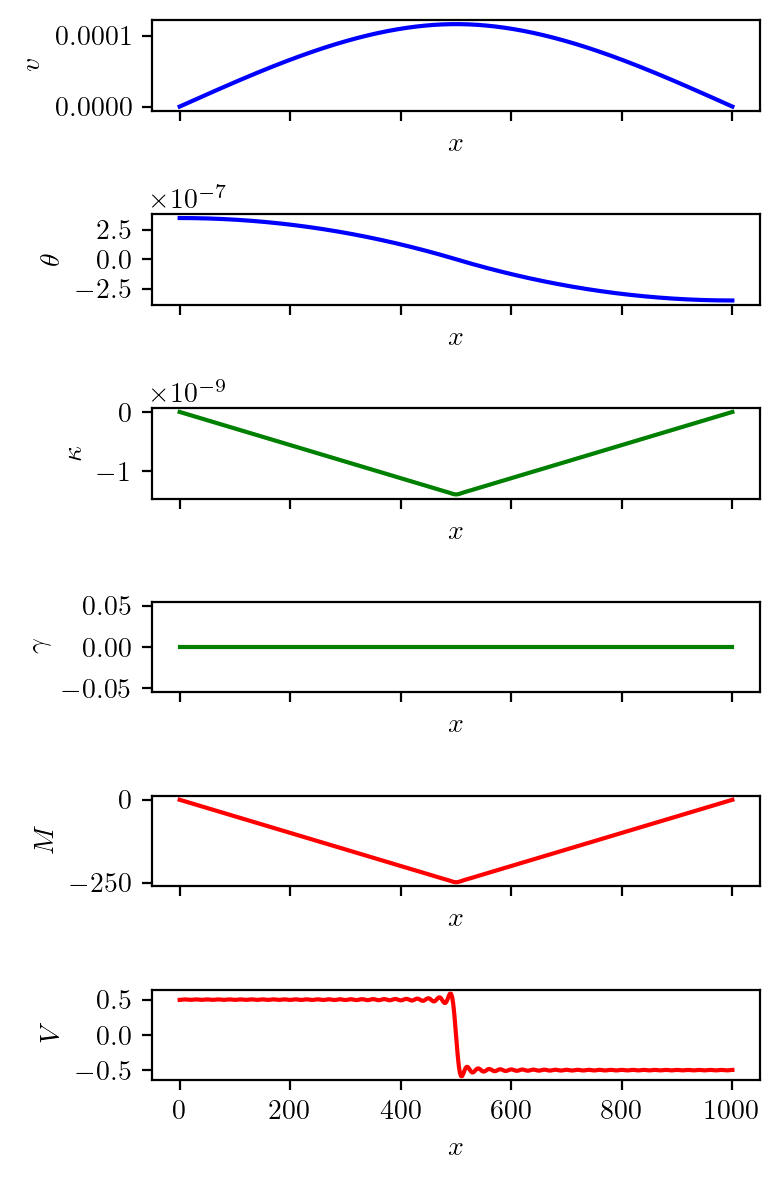

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sigmaepsilon.solid.fourier import LoadGroup, PointLoad, LineLoad
from sigmaepsilon.solid.fourier import NavierBeam

L = 1000.0  # geometry
w, h = 20.0, 80.0  # rectangular cross-section
E, nu = 210000.0, 0.25  # material

I = w * h**3 / 12
EI = E * I

loads = LoadGroup(
    concentrated=LoadGroup(
        LC1=PointLoad(x=L / 2, v=[1.0, 0.0]),
        LC5=PointLoad(x=L / 2, v=[0.0, 1.0]),
    ),
    distributed=LoadGroup(
        LC2=LineLoad(x=[0, L], v=[1.0, 0.0]),
        LC6=LineLoad(x=[L / 2, L], v=[0.0, 1.0]),
        LC3=LineLoad(x=[L / 2, L], v=["x", 0]),
    ),
)
loads.lock()  # to protect agains typos

x = np.linspace(0, L, 500)  # evaluate in 500 points

beam = NavierBeam(L, 100, EI=EI)
solution = beam.solve(loads, x)

labels = [r"$v$", r"$\theta$", r"$\kappa$", r"$\gamma$", r"$M$", r"$V$"]
colors = ["b", "b", "g", "g", "r", "r"]

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "sans-serif",
    }
)


def plot(x, res):
    fig, axs = plt.subplots(6, 1, figsize=(4, 6), dpi=200, sharex=True)
    for i in range(len(labels)):
        axs[i].plot(x, res[:, i], colors[i])
        axs[i].set_xlabel("$x$")
        axs[i].set_ylabel(labels[i])
    plt.subplots_adjust(hspace=0.1)

    fig.tight_layout()


# plot the results for the point load at the middle
plot(x, solution["concentrated", "LC1"].values)  # try the others too